# **World Bank Social Development Dataset:** *Visualizations*
### Source: [World Bank Social Development](https://data.worldbank.org/topic/social-development?view=chart)

#### Our questions:
<ol>
<li>How do the indicators differ in countries, especially in those that are labeled as low income?</li>
<li>What is the labor force participation rate per region?</li>
<li>What is the labor force participation rate per income group?</li>
<li>In regions that show children under the age of 14 working and attending school, what is their literacy rate upon entering adolescence?</li>
</ol>

In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up code
data = pd.read_csv('data/data-cleaned.csv')
countries = data[data['Region'] != 'N/A']
regions = data[data['Region'] == 'N/A']

# Make sure data imported correctly
print(data.head())

   Unnamed: 0 Country                                          Indicator  \
0           0   Aruba             Life expectancy at birth, male (years)   
1           1   Aruba           Life expectancy at birth, female (years)   
2           2   Aruba  Adolescent fertility rate (births per 1,000 wo...   
3           3   Aruba  Refugee population by country or territory of ...   
4           4   Aruba  Refugee population by country or territory of ...   

                      Region  IncomeGroup  Year     Value  
0  Latin America & Caribbean  High income  1960   64.0840  
1  Latin America & Caribbean  High income  1960   67.1290  
2  Latin America & Caribbean  High income  1960  106.2062  
3  Latin America & Caribbean  High income  1960       NaN  
4  Latin America & Caribbean  High income  1960       NaN  


In [55]:
print(data['Indicator'].unique())

['Life expectancy at birth, male (years)'
 'Life expectancy at birth, female (years)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Refugee population by country or territory of origin'
 'Refugee population by country or territory of asylum'
 'Unemployment, male (% of male labor force) (modeled ILO estimate)'
 'Unemployment, female (% of female labor force) (modeled ILO estimate)'
 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)'
 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'
 'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'
 'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)'
 'Labor force partici

### Visualizations

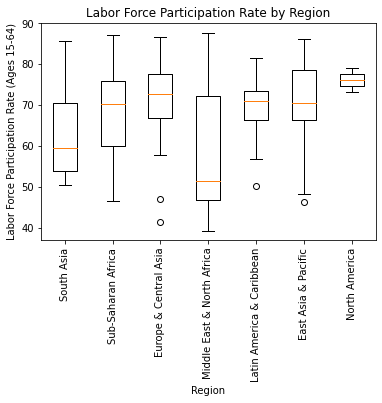

In [56]:
# Box and whiskers chart for labor participation rate by region income
labor_participation = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Include only one year
labor_participation = labor_participation.loc[countries['Year'] == 2019]

# Exclude nan
labor_participation = labor_participation.loc[labor_participation['Region'].notna()]
labor_participation = labor_participation.loc[labor_participation['Value'].notna()]

# Break down by regions
labor_participation = labor_participation[['Region', 'Value']]
labor_values = []
labels = labor_participation['Region'].unique()
for region in labels:
    labor_values.append(labor_participation[labor_participation['Region'] == region]['Value'])

# Plot in box and whiskers plot
plt.boxplot(labor_values, labels=labels)
plt.xticks(rotation=90)
plt.title('Labor Force Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Labor Force Participation Rate (Ages 15-64)')
plt.show()

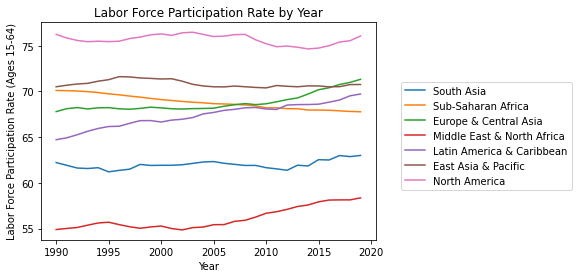

In [71]:
# Box and whiskers chart for labor participation rate by region income
labor_participation = countries[countries['Indicator'] == r'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)']

# Exclude nan
labor_participation = labor_participation.loc[labor_participation['Region'].notna()]
labor_participation = labor_participation.loc[labor_participation['Value'].notna()]

# Break down by regions
labor_participation = labor_participation[['Region', 'Value', 'Year']]
values = []
years = labor_participation['Year'].unique()
regions = labor_participation['Region'].unique()
for region in regions:
    this_region = []
    for year in years:
        curr = labor_participation.loc[labor_participation['Region'] == region]
        curr = curr.loc[labor_participation['Year'] == year]
        avg = curr['Value'].mean()
        this_region.append(avg)
    values.append(this_region)

# Plot in box and whiskers plot
for i in range(len(regions)):
    plt.plot(years, values[i])
plt.legend(regions, bbox_to_anchor=(1.6, 0.75))
plt.title('Labor Force Participation Rate by Year')
plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate (Ages 15-64)')
plt.show()


In [58]:
# Root bar: (1) rate of working underage; and (2) literacy rate